<a href="https://colab.research.google.com/github/PosgradoMNA/A01793027_Actividades_de_aprendizaje_Carlos_Daniel_Mendoza_Paz/blob/main/Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ciencia y Analitica de datos**
##**Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones**


---

##**Profesora:** María de la Paz Rico Fernández
##**Alumno:** Carlos Daniel Mendoza Paz
##**Matricula:** A01793027


---
Octubre 27 2022



# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [40]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
x = np.dot(W,D).round() #Utilizamos np.dot, dado que estamos multiplicando matrices y esta función es para multiplicación de matrices
B = np.dot(x,Winv).round() #Dado que la funion dot() solo acepta dos parametros, hacemos la multiplicacioón en dos partes
#---------------------------------------------------
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [49]:
#Matriz 1
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]]) #Creamos la matriz y la asignamos a A1
print("-------Matriz 1 original-------")
print(A1)
print("-----------------------------\n")
values1, vectors1 = eig(A1)  #Calculamos los eigenvalues y los eigenvectors
print(values1) #D Imprimimos el valor de los eigenvalues
print(vectors1) #W Imprimimos el valor de los eigenvectors

#Ejemplo de reconstrucción
#B=W*D*Winv

values1, vectors1 = np.linalg.eig(A1)

W1 = vectors1
Winv1 = np.linalg.inv(W1)
D1 = np.diag(values1)
print("\n-------Matriz 1 reconstruida-------")
x1 = np.dot(W1,D1) #Utilizamos np.dot, dado que estamos multiplicando matrices y esta función es para multiplicación de matrices
B1 = np.dot(x1,Winv1).round()
print(B1)
print("-------------------------------------")

-------Matriz 1 original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]

-------Matriz 1 reconstruida-------
[[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.-0.j  1.+0.j]]
-------------------------------------


In [52]:
#Matriz 2
A2 = array([[1, 3, 8], [2, 0, 2], [0, 0, 1]]) #Creamos la matriz y la asignamos a A2
print("-------Matriz 2 original-------")
print(A2)
print("-------------------------------")
values2, vectors2 = eig(A2) #Calculamos los eigenvalues y los eigenvectors
print(values2) #Imprimimos el valor de los eigenvalues
print(vectors2) #Imprimimos el valor de los eigenvectors

#Ejemplo de reconstrucción
#B=W*D*Winv

values2, vectors2 = np.linalg.eig(A2)

W2 = vectors2
Winv2 = np.linalg.inv(W2)
D2 = np.diag(values2)

print("------------Matriz 2 reconstruida-----------------")
x2 = np.dot(W2,D2) #Utilizamos np.dot, dado que estamos multiplicando matrices y esta función es para multiplicación de matrices
B2 = np.dot(x2,Winv2).round() #B2 = (W2.dot(D2).dot(Winv2))
print(B2)
print("--------------------------------------------------")

-------Matriz 2 original-------
[[1 3 8]
 [2 0 2]
 [0 0 1]]
-------------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.63375022]
 [ 0.5547002   0.70710678 -0.72428597]
 [ 0.          0.          0.27160724]]
------------Matriz 2 reconstruida-----------------
[[1. 3. 8.]
 [2. 0. 2.]
 [0. 0. 1.]]
--------------------------------------------------


In [54]:
#Matriz 3
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]]) #Creamos la matriz y la asignamos a A3
print("-------Matriz 3 original-------")
print(A3)
print("-------------------------------")
values3, vectors3 = eig(A3) #Calculamos los eigenvalues y los eigenvectors
print(values3) #Imprimimos el valor de los eigenvalues
print(vectors3) #Imprimimos el valor de los eigenvectors

#Ejemplo de reconstrucción
#B=W*D*Winv

values3, vectors3 = np.linalg.eig(A3)

W3 = vectors3
Winv3 = np.linalg.inv(W3)
D3 = np.diag(values3)

print("----------------Matriz 3 reconstruida---------------")
x3 = np.dot(W3,D3) #Utilizamos np.dot, dado que estamos multiplicando matrices y esta función es para multiplicación de matrices
B3 = (W3.dot(D3).dot(Winv3)).round()
print(B3)
print("----------------------------------------------------")


-------Matriz 3 original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-------------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
----------------Matriz 3 reconstruida---------------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
----------------------------------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


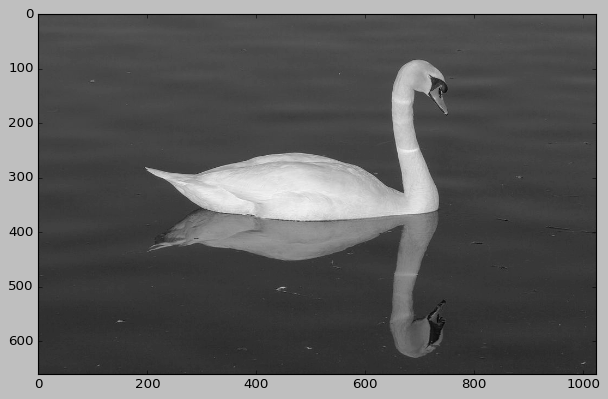

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F20BC7EDFD0>


In [6]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [7]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [8]:
U.shape

(660, 660)

In [9]:
V.shape

(1024, 1024)

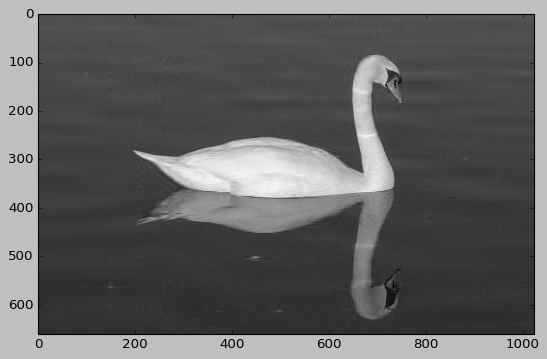

Felicidades la imagen está comprimida


In [10]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

Ahora vamos aplicar la técnica SVD para poder comprimir una imagen. Vamos a jugar con el número de componentes a mantener a manera que podamos ver la imagen claramente.

###Imagen 1

[ 21.  21.  21. ... 141. 143. 144.]


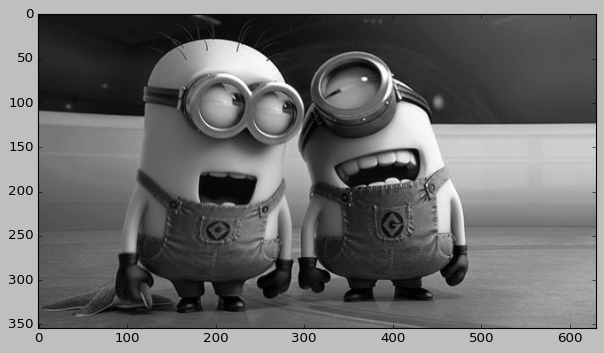

<PIL.Image.Image image mode=LA size=630x354 at 0x7F209C03D850>


In [55]:
#imagen 1
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
minion = Image.open(urllib.request.urlopen('https://www.cleverfiles.com/howto/wp-content/uploads/2018/03/minion.jpg')).convert('LA') #Ponemos el path de donde sacamos la imagen

miniongray = minion.convert('LA')
minion_imgmat = np.array(list(miniongray.getdata(band=0)),float)
#Imprimimos la imagen original
print(minion_imgmat)
#Obtenemos los datos y dimension de la imagen
minion_imgmat.shape = (miniongray.size[1],miniongray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(minion_imgmat,cmap='gray')
plt.show()
print(minion)


In [12]:
#Aplicamos el metodo SVD usando la librería de numpy
U1,D1,V1 = np.linalg.svd(minion_imgmat)
minion_imgmat.shape

(354, 630)

In [13]:
#Obtenemos las dimensiones de U
U1.shape

(354, 354)

In [14]:
#Obtenemos las dimensiones de V
V1.shape

(630, 630)

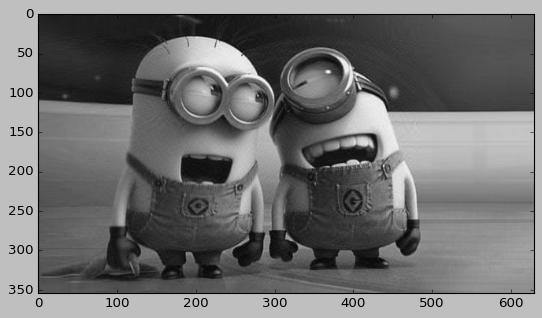

Felicidades la imagen está comprimida


In [15]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-354, siendo 354 como normalmente están los datos

nvalue = 90 #El número de componentes optimos a conservar para mantener la calidad de la imagen es 90

#------------------------------
#Ahora reconstruimos nuestra imagen
reconstimg = np.matrix(U1[:,:nvalue])*np.diag(D1[:nvalue])*np.matrix(V1[:nvalue,:])

#Imprimimos nuestra imagen ya reconstruida
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

###Imagen 2

[203. 183. 196. ... 105.  98. 118.]


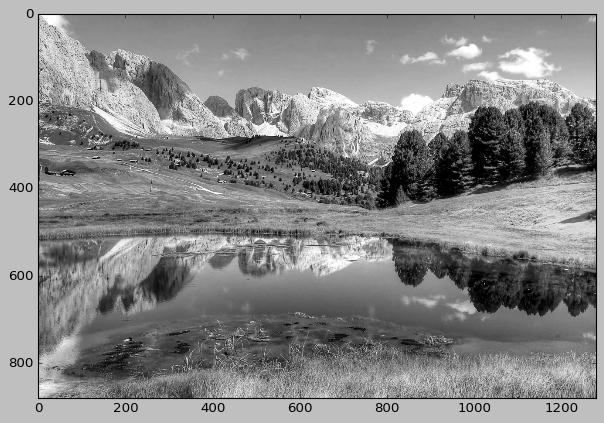

<PIL.Image.Image image mode=LA size=1280x880 at 0x7F20B22566D0>


In [16]:
#imagen 2
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
landscape = Image.open(urllib.request.urlopen('https://idegrafico.com/wp-content/uploads/2017/03/Las-imagenes-raw-son-los-negativos-digitales.jpg')).convert('LA')#ponemos el path de donde sacamos la imagen

landscapegray = landscape.convert('LA')
landscape_imgmat = np.array(list(landscapegray.getdata(band=0)),float)
#Imprimimos la imagen original
print(landscape_imgmat)
#Obtenemos los datos de la imagen
landscape_imgmat.shape = (landscapegray.size[1],landscapegray.size[0])

plt.figure(figsize=(9,6))
#Imprimimos la imagen original en tonalidad gris
plt.imshow(landscape_imgmat,cmap='gray')
plt.show()
print(landscape)


In [17]:
#Aplicamos la técnica SVD de la librería de numpy
U2,D2,V2 = np.linalg.svd(landscape_imgmat)
landscape_imgmat.shape

(880, 1280)

In [18]:
#Obtenemos las dimensiones de U
U2.shape

(880, 880)

In [19]:
#Obtenemos las dimensiones de V
V2.shape

(1280, 1280)

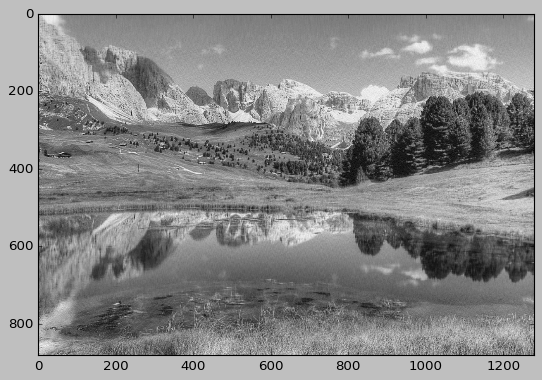

Felicidades la imagen está comprimida


In [20]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-880, siendo 880 como normalmente están los datos

nvalue = 200 #El número de componentes optimos a conservar para mantener la calidad de la imagen es 200

#------------------------------
#Reconstruimos nuestra imagen 
reconstimg = np.matrix(U2[:,:nvalue])*np.diag(D2[:nvalue])*np.matrix(V2[:nvalue,:])
#Imprimimos nuestra imagen ya reconstruida en escala de grises
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[207. 206. 206. ... 215. 215. 216.]


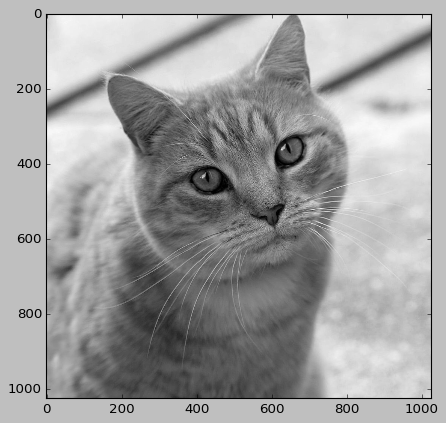

<PIL.Image.Image image mode=LA size=1025x1024 at 0x7F20B21F6B50>


In [21]:
#imagen 3
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
cat = Image.open(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1025px-Cat03.jpg')).convert('LA') #Ponemos el path de donde sacamos la imagen

catgray = cat.convert('LA')
cat_imgmat = np.array(list(catgray.getdata(band=0)),float)
#Imprimios la imagen
print(cat_imgmat)

cat_imgmat.shape = (catgray.size[1],catgray.size[0])
#Imprimimos la imagen original en escalas de grises
plt.figure(figsize=(9,6))
plt.imshow(cat_imgmat,cmap='gray')
plt.show()
print(cat)

In [22]:
#Aplicamos la técnica SVD
U3,D3,V3 = np.linalg.svd(cat_imgmat)
cat_imgmat.shape

(1024, 1025)

In [23]:
#Obtenemos las dimensiones de U
U3.shape

(1024, 1024)

In [24]:
#Obtenemos las dimensiones de V
V3.shape

(1025, 1025)

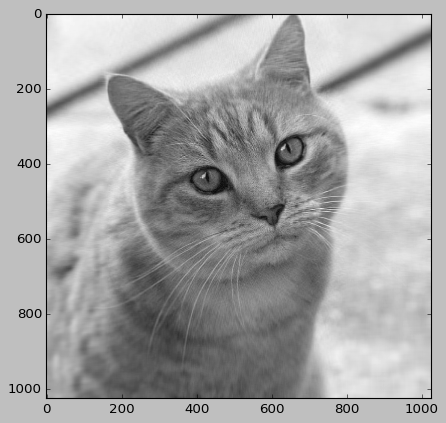

Felicidades la imagen está comprimida


In [25]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-1024, siendo 1024 como normalmente están los datos

nvalue = 100 #El número de componentes optimos a conservar para mantener la calidad de la imagen es 100

#------------------------------
#Reconstruimos nuestra imagen 
reconstimg = np.matrix(U3[:,:nvalue])*np.diag(D3[:nvalue])*np.matrix(V3[:nvalue,:])
#Imprimimos nuestra imagen en escala de grises
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




Importamos nuestras librerías que vamos a utilizar para el ejercicio.

In [26]:
#tu codigo aqui
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Cargamos los datos
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# Aplicamos la técnica de PCA
pca = PCA(n_components=2) # Solamente tendremos dos componentes, los cuales van a traer la mayor varianza de los datos
X_new = pca.fit_transform(X) # Proyectamos los datos originales en el espacio de PCA

Graficamos los datos antes y después de la transformación PCA, los identificamos con colores para una mejor visualización.

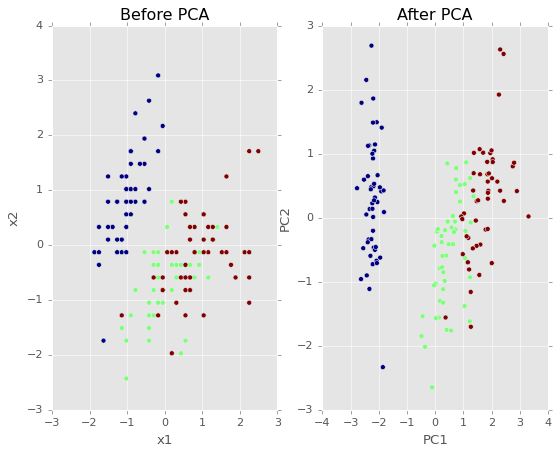

In [27]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

Observamos la varianza de cada uno de los componentes PCA. Como se puede observar en el gráfico original, los datos se encuentran como que mas dispersos en comparación del gráfico de la derecha que es cuando ya aplicamos el PCA.

Ahora imprimimos los valores de los componentes PC1 y PC2. Como se puede observar el componente PC1 contiene el 72% de los datos y el componente PC2 contiene el 22% de los datos. 
Entonces si tomamos ambos componentes, en conjunto tendríamos un 94% de la varianza de los datos.

In [28]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


Ahora sacamos la matriz de covarianza para ver la prueba de máxima varianza.

In [29]:
np.cov(X_new.T)
array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

Se observa que estos valores (que se encuentran en la diagonal) son iguales a los valores valores propios reales de la covarianza almacenada en:

In [30]:
pca.explained_variance_
array([2.93808505, 0.9201649 ])

array([2.93808505, 0.9201649 ])

Imprimimos los valores de los componentes pca.

In [31]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


Vemos que el primer componente, los features mas importantes son 1, 3 y 4.
[[0.52106591 0.26934744 0.5804131  0.56485654]
Y para el componente 2, los mas importantes son el feature 2 y el feature 1.
[0.37741762 0.92329566 0.02449161 0.06694199]]

Ahora vamos a visualizar un biplot para visualizar todo en uno, despues de un análisis PCA.

In [32]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

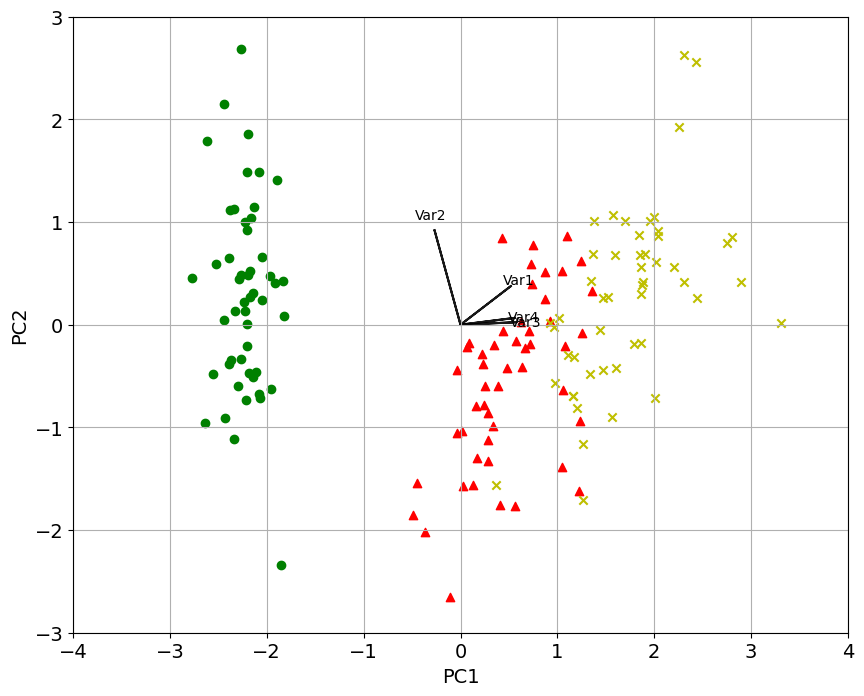

In [33]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

De nuevo podemos verificar visualmente que:
* a) la varianza está maximizada y
* b) que las características 1, 3 y 4 son las más importantes para PC1. 

De manera similar, la característica 2 y luego la 1 son las más importantes para PC2.

Además, las flechas (variables/características) que apuntan en la misma dirección indican correlación entre las variables que representan, mientras que las flechas que apuntan en direcciones opuestas indican un contraste entre las variables que representan.

In [34]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]
0.9628654314027957
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]
-0.42844010433054014

-0.42844010433054014

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

###**¿Qué es feature importance y para que nos sirve?**
Cuando aplicamos la técnica de PCA, descomponemos todos los datos, en vectores ortogonales, esto a manera de reducir el número de dimensiónes originales de nuestros datos. Estos vectores son conocidos como componentes y cada uno de esos componentes continenen una serie de datos no correlacionados.Por eso la importancia de cada característica se refleja en la magnitud de los valores correspondientes en los vectores propios (mayor magnitud, mayor importancia).

###**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**


Se pudo obtener cuales eran los features mas importantes de cada uno de los componentes obtenidos en el análisis de PCA asi como también se comprobó a través del gráfico biplot, que efectivamente los features que habíamos elegido anteriormente para los componentes PC1 y PC2 eran los mas importatntes ya que contenian la mayor varianza de los datos.

###**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**
Este análisis de PCA sin lugar a dudas es de gran ayuda, ya que si en algún punto del tiempo nos encontramos con un dataset de grandes dimensiones y si lo queremos meter así a nuestro modelo de machine learning, le será mas complicado realizar predicciones, por ende aplicando esta técnica de PCA podemos reducir esas dimensiones y así obtener mejor rendimiento en nuestro modelo de machine learning.
De igual forma esta técnica nos sirve para eliminar ruido en los datos y comprimirlos.



---

#**FIN**


---

